In [2]:
from collections import defaultdict
import math

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', font_scale=1.2)

In [14]:
plots_directory = '/Volumes/Passport-1/output/translations/dante/plots'

# FightingWords

In [3]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer as CV
import string
exclude = set(string.punctuation)

def basic_sanitize(in_string):
    '''Returns a very roughly sanitized version of the input string.'''
#     return_string = ' '.join(in_string.encode('ascii', 'ignore').strip().split())
#     return_string = ''.join(ch for ch in return_string if ch not in exclude)
#     return_string = return_string.lower()
#     return_string = ' '.join(return_string.split())
#     return return_string
    return ' '.join(in_string.lower().split())

def bayes_compare_language(l1, l2, ngram = 1, prior=.01, cv = None):
    '''
    Arguments:
    - l1, l2; a list of strings from each language sample
    - ngram; an int describing up to what n gram you want to consider (1 is unigrams,
    2 is bigrams + unigrams, etc). Ignored if a custom CountVectorizer is passed.
    - prior; either a float describing a uniform prior, or a vector describing a prior
    over vocabulary items. If you're using a predefined vocabulary, make sure to specify that
    when you make your CountVectorizer object.
    - cv; a sklearn.feature_extraction.text.CountVectorizer object, if desired.
    Returns:
    - A list of length |Vocab| where each entry is a (n-gram, zscore) tuple.'''
    if cv is None and type(prior) is not float:
        print("If using a non-uniform prior:")
        print("Please also pass a count vectorizer with the vocabulary parameter set.")
        quit()
    l1 = [basic_sanitize(l) for l in l1]
    l2 = [basic_sanitize(l) for l in l2]
    if cv is None:
        cv = CV(decode_error = 'ignore', min_df = 10, max_df = .5, ngram_range=(1,ngram),
                binary = False,
                max_features = 15000)
    counts_mat = cv.fit_transform(l1+l2).toarray()
    # Now sum over languages...
    vocab_size = len(cv.vocabulary_)
    print('Vocab size is ' + str(vocab_size))
    if type(prior) is float:
        priors = np.array([prior for i in range(vocab_size)])
    else:
        priors = prior
    z_scores = np.empty(priors.shape[0])
    count_matrix = np.empty([2, vocab_size], dtype=np.float32)
    count_matrix[0, :] = np.sum(counts_mat[:len(l1), :], axis = 0)
    count_matrix[1, :] = np.sum(counts_mat[len(l1):, :], axis = 0)
    a0 = np.sum(priors)
    n1 = 1.*np.sum(count_matrix[0,:])
    n2 = 1.*np.sum(count_matrix[1,:])
    print("Comparing language...")
    for i in range(vocab_size):
        #compute delta
        term1 = np.log((count_matrix[0,i] + priors[i])/(n1 + a0 - count_matrix[0,i] - priors[i]))
        term2 = np.log((count_matrix[1,i] + priors[i])/(n2 + a0 - count_matrix[1,i] - priors[i]))        
        delta = term1 - term2
        #compute variance on delta
        var = 1./(count_matrix[0,i] + priors[i]) + 1./(count_matrix[1,i] + priors[i])
        #store final score
        z_scores[i] = delta/np.sqrt(var)
    index_to_term = {v:k for k,v in cv.vocabulary_.items()}
    sorted_indices = np.argsort(z_scores)
    return_list = []
    for i in sorted_indices:
        return_list.append((index_to_term[i], z_scores[i]))
    return return_list

# Run FightingWords on Longfellow vs Cary

In [5]:
directory_path = '/Volumes/Passport-1/data/dante'
file_names = ['longfellow_full_gutenberg.txt', 'cary_full_gutenberg.txt']

texts = []

for _file_name in file_names:
    
    with open(directory_path + '/' + _file_name, 
              'r', 
              encoding='utf-8', 
              errors='ignore') as _book_file:
    
        _lines = _book_file.read().split('\n')
        _lines = [_line.strip() for _line in _lines if _line.strip()]
        texts.append(_lines)

        for _line in _lines[:30]:
            print(_line)
            print('---')
        print('\n\n===============\n\n')

Incipit Comoedia Dantis Alagherii,
---
Florentini natione, non moribus.
---
The Divine Comedy
---
translated by Henry Wadsworth Longfellow
---
(e-text courtesy ILT's Digital Dante Project)
---
INFERNO
---
Inferno: Canto I
---
Midway upon the journey of our life
---
I found myself within a forest dark,
---
For the straightforward pathway had been lost.
---
Ah me! how hard a thing it is to say
---
What was this forest savage, rough, and stern,
---
Which in the very thought renews the fear.
---
So bitter is it, death is little more;
---
But of the good to treat, which there I found,
---
Speak will I of the other things I saw there.
---
I cannot well repeat how there I entered,
---
So full was I of slumber at the moment
---
In which I had abandoned the true way.
---
But after I had reached a mountain's foot,
---
At that point where the valley terminated,
---
Which had with consternation pierced my heart,
---
Upward I looked, and I beheld its shoulders,
---
Vested already with that planet's

In [5]:
fw_results = bayes_compare_language(texts[0], texts[1], ngram = 1, prior=.01, cv = None)

Vocab size is 2068
Comparing language...


In [6]:
for _word, _zscore in sorted(fw_results, key=lambda tup: tup[1], reverse=True)[:50]:
    print(_word, _zscore)

it 13.679235241804504
unto 12.915310541529758
has 10.13496466341805
said 9.958594949702416
upon 9.524926525543648
and 9.420919984676772
is 9.09317389914741
because 8.362617976445025
which 8.100100405964623
people 7.9094285161181705
be 7.842539218078627
even 7.577841101934177
me 7.110378481134426
made 7.078780716496724
itself 6.97319412761961
was 6.924447960786116
make 6.37782492141516
turned 6.257438601830363
already 6.039180606896589
about 5.678873184974721
tis 5.66652687720248
go 5.500939403468001
great 5.410569346170317
you 5.3912231265348804
little 5.38374726988518
heaven 5.332334370882253
became 5.12006992286319
do 5.031464403477176
moved 4.967070939024338
out 4.904739894725769
the 4.87834793615301
would 4.776565918325518
cannot 4.592477477150358
think 4.580251016863767
within 4.549337675871513
going 4.542125934494615
speaking 4.5398084464341
seemed 4.42391223902484
farther 4.381915571010597
greater 4.319759984789079
does 4.305318293124139
answered 4.297794923220787
master 4.27671

In [7]:
for _word, _zscore in sorted(fw_results, key=lambda tup: tup[1], reverse=True)[-50:]:
    print(_word, _zscore)

fail -4.046658858993871
bent -4.072541382606881
rest -4.079338431787063
stretch -4.079712633230877
replied -4.0948448616433755
ill -4.129728252641175
visage -4.15731737947598
course -4.230827705608762
stream -4.2355631906338935
ere -4.264543076498327
none -4.3545677062126735
deem -4.362778489876645
past -4.363332170217139
each -4.502242777961507
steep -4.587167658324871
or -4.589713773918921
bright -4.642717059160629
cried -4.647983910516293
their -4.648323263329927
er -4.655515778023244
wave -4.6823753214468935
pass -4.71040216202356
reach -4.8060177631889145
call -4.8060177631889145
fix -4.999032341232617
lo -5.009201591278752
spirits -5.168351019243859
guide -5.277370425882706
straight -5.51027288996916
space -5.5772622495163935
thy -5.819454565962338
next -5.90780902671531
answer -5.955724370032331
spirit -6.023292261808697
th -6.104671764766685
view -6.131542923959081
ye -6.265695882408621
ring -6.3777528035188595
his -6.44194076859289
seem -6.510810542605629
mark -7.7652458339504

In [8]:
word_frequency_dict = defaultdict(int)

for _line in texts[0] + texts[1]:
    for _word in _line.lower().split():
        word_frequency_dict[_word] += 1
        
for v, k in sorted(((v,k) for k,v in word_frequency_dict.items()), reverse=True)[:100]:
    print(v, k)

11686 the
7121 and
5037 of
4676 to
4216 that
3624 i
3321 in
2258 with
2220 a
2146 as
1754 from
1716 my
1714 he
1702 who
1702 thou
1701 his
1697 so
1631 is
1565 it
1507 not
1446 for
1394 was
1354 which
1191 on
1183 me
1145 by
1098 this
1089 but
951 one
903 all
868 their
853 thy
845 had
840 be
823 if
810 when
785 its
753 at
736 they
681 him
676 were
658 there
651 such
649 her
636 more
633 then
610 now
594 have
589 what
589 we
580 upon
545 thus
534 are
519 unto
514 our
507 where
501 thee
493 or
488 no
472 other
467 me,
445 them
419 through
408 may
400 nor
395 than
390 will
389 she
382 how
382 did
373 us
373 made
372 shall
365 here
362 yet
351 doth
346 those
333 first
325 whom
321 these
321 each
318 eyes
288 saw
287 still
283 like
264 would
259 whence
259 him,
257 before
256 into
254 whose
249 see
249 down
248 your
247 has
244 mine
240 hath
239 great
233 said
233 good


In [9]:
dicts_to_plot = []

for _word, _zscore in fw_results:
    
    if word_frequency_dict[_word] != 0:
        
        _tendency = 'Longfellow'
        if _zscore < 0:
            _tendency = 'Cary'

        dicts_to_plot.append({'Word': _word,
                              'Z-Score': _zscore,
                              'Frequency': math.log(word_frequency_dict[_word]),
                              'Tendency': _tendency})
    
df_to_plot = pd.DataFrame(dicts_to_plot)

df_to_plot.sample(10)

,Frequency,Tendency,Word,Z-Score
403,2.484907,Cary,renown,-1.820526
1577,2.079442,Longfellow,margins,1.166951
501,1.609438,Cary,mantuan,-1.508843
1689,4.304065,Longfellow,between,1.693552
461,8.108021,Cary,in,-1.642553
1183,2.564949,Longfellow,monster,0.123534
1966,3.737670,Longfellow,speaking,4.539808
1059,2.708050,Cary,increase,-0.087616
1723,1.945910,Longfellow,standard,1.870356
843,2.484907,Cary,former,-0.608839


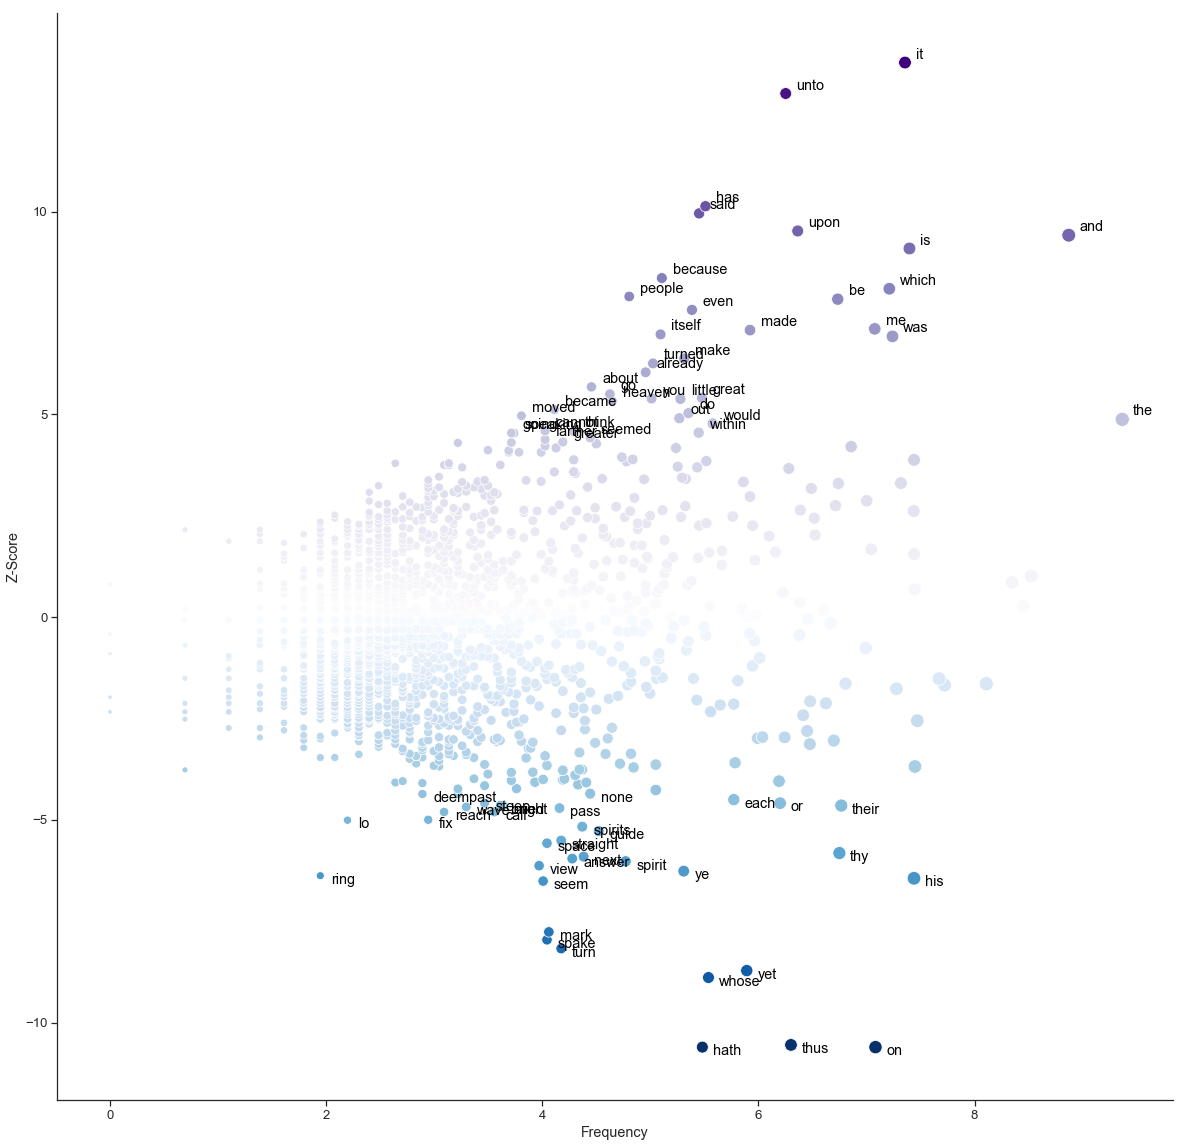

In [10]:
plt.figure(figsize=(20, 20))
sns.scatterplot(data=df_to_plot.loc[df_to_plot['Tendency'] == 'Longfellow'], 
                x='Frequency', 
                y='Z-Score', 
                hue='Z-Score',
                palette='Purples',
                size='Frequency',
                sizes=(20, 200))
sns.scatterplot(data=df_to_plot.loc[df_to_plot['Tendency'] == 'Cary'], 
                x='Frequency', 
                y='Z-Score', 
                hue='Z-Score',
                palette='Blues_r',
                size='Frequency',
                sizes=(20, 200))
plt.legend().set_visible(False)

for _word, _zscore in sorted(fw_results, key=lambda tup: tup[1], reverse=True)[:40]:
    if word_frequency_dict[_word] != 0:
        plt.text(math.log(word_frequency_dict[_word]) + 0.1, 
                 _zscore + 0.1, 
                 _word, 
                 horizontalalignment='left', 
                 size='medium', 
                 color='black', 
                 weight='light')
for _word, _zscore in sorted(fw_results, key=lambda tup: tup[1], reverse=True)[-40:]:
    if word_frequency_dict[_word] != 0:
        plt.text(math.log(word_frequency_dict[_word]) + 0.1, 
                 _zscore - 0.2, 
                 _word, 
                 horizontalalignment='left', 
                 size='medium', 
                 color='black', 
                 weight='light')
sns.despine()

In [ ]:
# how to fix this algorithm to identify non-obvious differences

# Run FightingWords on Inferno vs Paradiso (Cary)

In [57]:
directory_path = '/Volumes/Passport-1/data/dante'
file_names = ['cary_paradiso_gutenberg.txt', 'cary_inferno_gutenberg.txt']

texts = []

for _file_name in file_names:
    
    with open(directory_path + '/' + _file_name, 
              'r', 
              encoding='utf-8', 
              errors='ignore') as _book_file:
    
        _lines = _book_file.read().split('\n')
        _lines = [_line.strip() for _line in _lines if _line.strip()]
        texts.append(_lines)
            
        for _line in _lines[:30]:
            print(_line)
            print('---')
        print('\n\n===============\n\n')

CANTO I
---
His glory, by whose might all things are mov'd,
---
Pierces the universe, and in one part
---
Sheds more resplendence, elsewhere less.  In heav'n,
---
That largeliest of his light partakes, was I,
---
Witness of things, which to relate again
---
Surpasseth power of him who comes from thence;
---
For that, so near approaching its desire
---
Our intellect is to such depth absorb'd,
---
That memory cannot follow.  Nathless all,
---
That in my thoughts I of that sacred realm
---
Could store, shall now be matter of my song.
---
Benign Apollo! this last labour aid,
---
And make me such a vessel of thy worth,
---
As thy own laurel claims of me belov'd.
---
Thus far hath one of steep Parnassus' brows
---
Suffic'd me; henceforth there is need of both
---
For my remaining enterprise Do thou
---
Enter into my bosom, and there breathe
---
So, as when Marsyas by thy hand was dragg'd
---
Forth from his limbs unsheath'd.  O power divine!
---
If thou to me of shine impart so much,
---
That

In [58]:
fw_results = bayes_compare_language(texts[0], texts[1], ngram = 1, prior=.01, cv = None)

Vocab size is 859
Comparing language...


In [59]:
for _word, _zscore in sorted(fw_results, key=lambda tup: tup[1], reverse=True)[:50]:
    print(_word, _zscore)

light 6.35257593706806
its 6.24287576702839
love 6.201124625877973
heav 6.130556640924882
in 6.03229218530928
which 5.73769702477174
it 5.540352424903237
of 5.48199674398142
unto 5.121446713926101
beatrice 4.5690903887502765
doth 4.518407680058671
truth 4.486848837826046
sun 4.416555312969401
good 4.239188152742175
and 4.215731246535788
is 4.189555739196767
grace 4.1211274242604485
virtue 4.120440831936071
most 4.083063726962192
holy 4.077089086523616
her 4.053666192760415
beam 3.8822245783295157
god 3.8192564074792648
such 3.5824236199194988
own 3.559923704007584
mortal 3.557212562010946
itself 3.5450028733764936
she 3.508483370816229
that 3.504166300195664
nature 3.383421152346476
lady 3.2609246866926234
joy 3.205436102142294
sweet 3.192381899631666
as 3.1476334922757787
eternal 3.1432467332363916
your 3.123386436685472
pleasure 3.0486363895446345
song 3.009905132052514
saintly 2.993596752649606
vision 2.993596752649606
cause 2.9928802700397275
sacred 2.9678606675484747
did 2.9538845

In [60]:
for _word, _zscore in sorted(fw_results, key=lambda tup: tup[1], reverse=True)[-50:]:
    print(_word, _zscore)

who -2.8059889451684383
arm -2.8518426177937406
turning -2.8518426177937406
air -2.882366939064807
spirits -2.910529271902749
grief -2.9154315349314595
on -2.921368749852739
exclaim -2.9666795020566408
at -2.9718206169332184
spake -3.002020900874035
stood -3.062667348241716
close -3.0657445883099417
onward -3.0657445883099417
evil -3.110043663900796
steep -3.161057578883368
if -3.176638649985653
me -3.2272143469513055
one -3.2509203731815535
art -3.2633648035752505
now -3.2970576955266586
land -3.3273524146204587
face -3.349262588971577
fell -3.3504669009457078
head -3.42041746793246
woe -3.4369522623262196
they -3.554242951191541
side -3.5564891319497844
pass -3.6420830805701936
fear -3.6492312421982493
came -3.665574242758899
answer -3.704389427216576
thou -3.727403390899387
beneath -3.8702666793133766
feet -3.884902156250237
then -3.9813012232738787
er -3.9837322645742836
master -4.086256191543073
his -4.220800770526095
my -4.229162777859991
rock -4.2597235149350725
replied -4.26601

In [61]:
word_frequency_dict = defaultdict(int)

for _line in texts[0] + texts[1]:
    for _word in _line.lower().split():
        word_frequency_dict[_word] += 1
        
for v, k in sorted(((v,k) for k,v in word_frequency_dict.items()), reverse=True)[:100]:
    print(v, k)

3702 the
2050 and
1597 of
1549 to
1330 that
1206 in
1084 i
731 with
697 as
677 his
615 from
595 a
579 my
535 so
531 he
524 thou
518 who
491 on
476 for
429 is
424 not
383 was
356 which
355 but
354 this
350 it
341 by
333 thy
333 their
320 me
318 all
281 its
269 when
269 at
257 they
255 thus
251 one
246 such
232 her
230 had
224 then
223 if
221 were
218 be
215 him
194 now
189 our
187 what
185 or
182 yet
181 more
180 we
175 have
173 there
171 are
167 no
162 through
162 nor
156 hath
149 where
149 thee
147 other
144 them
141 whom
139 may
137 me,
136 whose
130 each
129 these
128 shall
127 than
119 here
118 will
116 how
116 first
113 she
105 like
105 did
102 upon
102 him,
98 whence
95 doth
92 th'
91 those
90 e'en
89 saw
87 well
86 into
83 us
83 thee,
82 made
82 eyes
79 your
79 forth
79 down
78 still
77 mine
71 must
71 light
70 ye


In [62]:
dicts_to_plot = []

for _word, _zscore in fw_results:
    
    if word_frequency_dict[_word] != 0:
        
        _tendency = 'Paradiso'
        if _zscore < 0:
            _tendency = 'Inferno'

        dicts_to_plot.append({'Word': _word,
                              'Z-Score': _zscore,
                              'Frequency': math.log(word_frequency_dict[_word]),
                              'Tendency': _tendency})
    
df_to_plot = pd.DataFrame(dicts_to_plot)

df_to_plot.sample(10)

,Word,Z-Score,Frequency,Tendency
819,beatrice,4.569090,3.218876,Paradiso
777,lights,2.707290,2.079442,Paradiso
453,take,0.032167,2.944439,Paradiso
243,shun,-1.207112,2.079442,Inferno
364,note,-0.393757,2.564949,Inferno
571,hast,0.789994,3.784190,Paradiso
703,angels,1.770177,1.609438,Paradiso
745,wonder,2.222187,2.397895,Paradiso
30,art,-3.263365,4.077537,Inferno
324,forthwith,-0.666954,3.433987,Inferno


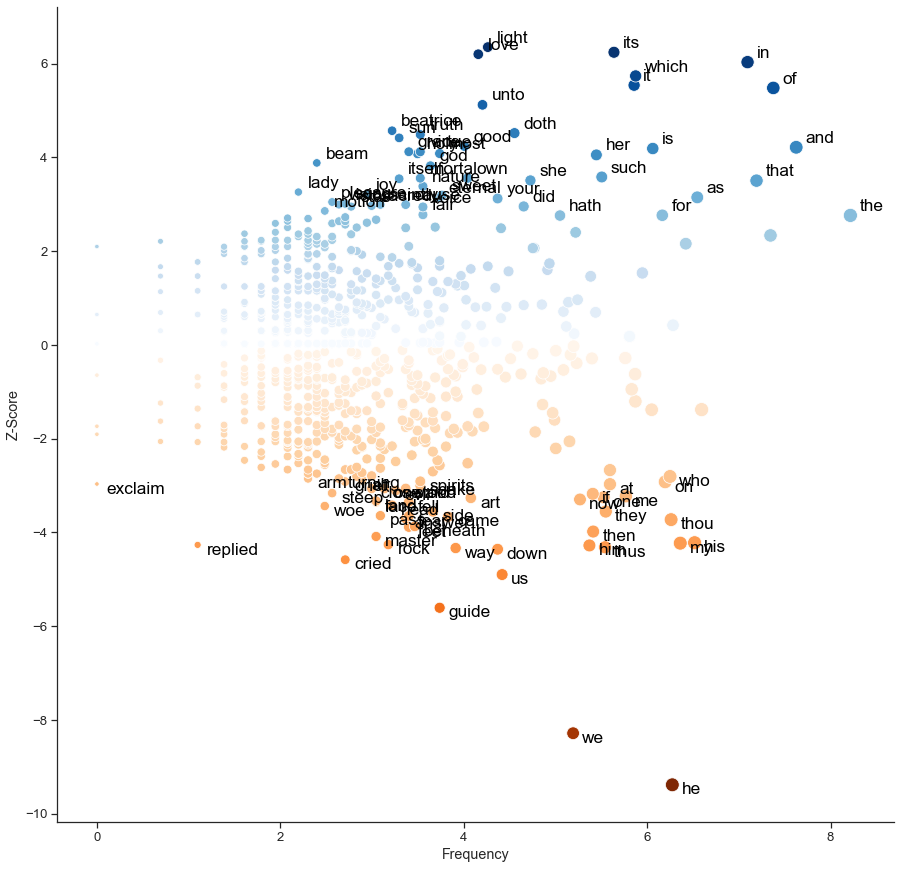

In [63]:
plt.figure(figsize=(15, 15))
sns.scatterplot(data=df_to_plot.loc[df_to_plot['Tendency'] == 'Inferno'], 
                x='Frequency', 
                y='Z-Score', 
                hue='Z-Score',
                palette='Oranges_r',
                size='Frequency',
                sizes=(20, 200))
sns.scatterplot(data=df_to_plot.loc[df_to_plot['Tendency'] == 'Paradiso'], 
                x='Frequency', 
                y='Z-Score', 
                hue='Z-Score',
                palette='Blues',
                size='Frequency',
                sizes=(20, 200))
plt.legend().set_visible(False)

for _word, _zscore in sorted(fw_results, key=lambda tup: tup[1], reverse=True)[:50]:
    if word_frequency_dict[_word] != 0:
        plt.text(math.log(word_frequency_dict[_word]) + 0.1, 
                 _zscore + 0.1, 
                 _word, 
                 horizontalalignment='left', 
                 size='large', 
                 color='black', 
                 weight='light')
for _word, _zscore in sorted(fw_results, key=lambda tup: tup[1], reverse=True)[-50:]:
    if word_frequency_dict[_word] != 0:
        plt.text(math.log(word_frequency_dict[_word]) + 0.1, 
                 _zscore - 0.2, 
                 _word, 
                 horizontalalignment='left', 
                 size='large', 
                 color='black', 
                 weight='light')
sns.despine()
plt.savefig(plots_directory + '/fightingwords_inferno_vs_paradiso_cary.png')

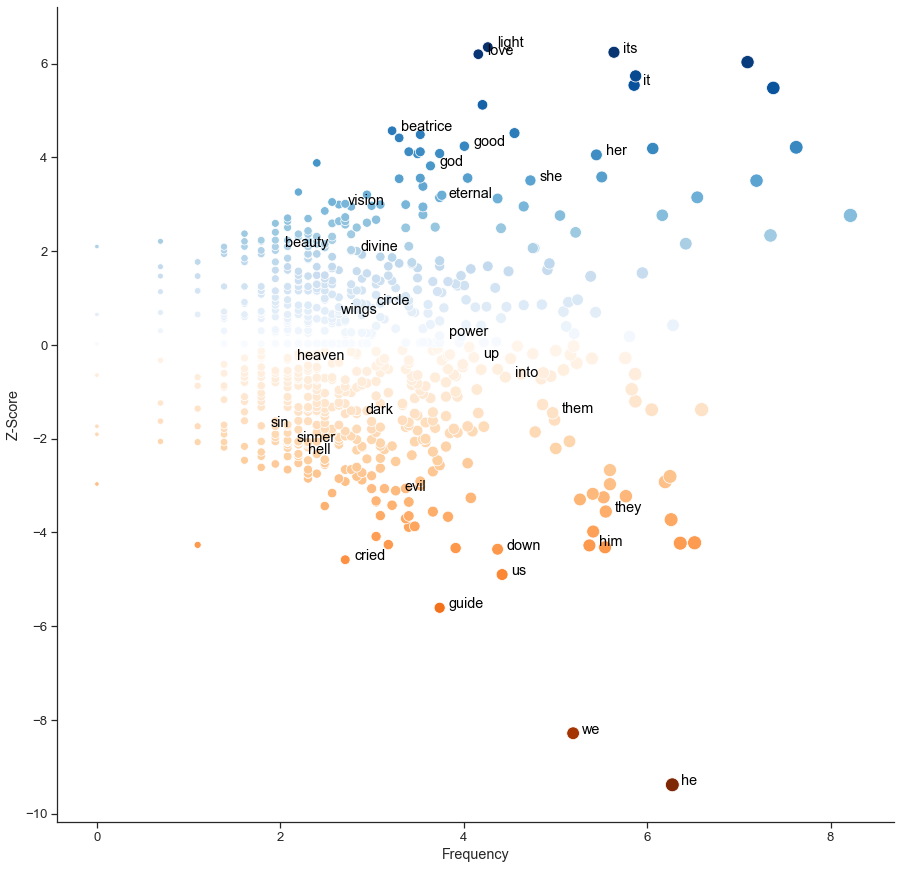

In [64]:
plt.figure(figsize=(15, 15))
sns.scatterplot(data=df_to_plot.loc[df_to_plot['Tendency'] == 'Inferno'], 
                x='Frequency', 
                y='Z-Score', 
                hue='Z-Score',
                palette='Oranges_r',
                size='Frequency',
                sizes=(20, 200))
sns.scatterplot(data=df_to_plot.loc[df_to_plot['Tendency'] == 'Paradiso'], 
                x='Frequency', 
                y='Z-Score', 
                hue='Z-Score',
                palette='Blues',
                size='Frequency',
                sizes=(20, 200))
plt.legend().set_visible(False)

for _word, _zscore in sorted(fw_results, key=lambda tup: tup[1], reverse=True):
    if _word in ['beatrice', 'vergil', 'poet', 'guide', 'light', 'love', 'he', 'she',
                 'her', 'him', 'we', 'us', 'they', 'them', 'dark', 'heaven', 'hell',
                 'sin', 'good', 'evil', 'forgive', 'power', 'eternal', 'divine', 'vision',
                 'cried', 'wept', 'god', 'cried', 'sinner', 'beauty', 'beautiful', 'it', 'its',
                 'story', 'up', 'down', 'into', 'wings', 'circle']:
        if word_frequency_dict[_word] != 0:
            plt.text(math.log(word_frequency_dict[_word]) + 0.1, 
                     _zscore, 
                     _word, 
                     horizontalalignment='left', 
                     size='medium', 
                     color='black', 
                     weight='light')
sns.despine()
plt.savefig(plots_directory + '/fightingwords_inferno_vs_paradiso_cary.selected.png')

# Run FightingWords on Inferno vs Paradiso (Longfellow)

In [65]:
directory_path = '/Volumes/Passport-1/data/dante'
file_names = ['longfellow_paradiso_gutenberg.txt', 'longfellow_inferno_gutenberg.txt']

texts = []

for _file_name in file_names:
    
    with open(directory_path + '/' + _file_name, 
              'r', 
              encoding='utf-8', 
              errors='ignore') as _book_file:
    
        _lines = _book_file.read().split('\n')
        _lines = [_line.strip() for _line in _lines if _line.strip()]
        texts.append(_lines)
            
        for _line in _lines[:30]:
            print(_line)
            print('---')
        print('\n\n===============\n\n')

Paradiso: Canto I
---
The glory of Him who moveth everything
---
Doth penetrate the universe, and shine
---
In one part more and in another less.
---
Within that heaven which most his light receives
---
Was I, and things beheld which to repeat
---
Nor knows, nor can, who from above descends;
---
Because in drawing near to its desire
---
Our intellect ingulphs itself so far,
---
That after it the memory cannot go.
---
Truly whatever of the holy realm
---
I had the power to treasure in my mind
---
Shall now become the subject of my song.
---
O good Apollo, for this last emprise
---
Make of me such a vessel of thy power
---
As giving the beloved laurel asks!
---
One summit of Parnassus hitherto
---
Has been enough for me, but now with both
---
I needs must enter the arena left.
---
Enter into my bosom, thou, and breathe
---
As at the time when Marsyas thou didst draw
---
Out of the scabbard of those limbs of his.
---
O power divine, lend'st thou thyself to me
---
So that the shadow of the

In [66]:
fw_results = bayes_compare_language(texts[0], texts[1], ngram = 1, prior=.01, cv = None)

Vocab size is 788
Comparing language...


In [67]:
for _word, _zscore in sorted(fw_results, key=lambda tup: tup[1], reverse=True)[:50]:
    print(_word, _zscore)

its 7.826682824735136
light 7.194871034314673
in 6.657450538152543
love 6.242695977727335
that 5.5137234605965055
it 5.488958772284186
holy 5.160366450445721
heaven 5.11844841000966
itself 4.998357338990984
her 4.971870537438529
own 4.50512968667259
which 4.460238378685119
most 4.390925676064515
beatrice 4.306337933391131
grace 4.272254058231295
truth 4.231522403468017
lady 4.15980639008129
nature 4.055174216864104
god 4.033145037365606
mind 3.954193549082467
is 3.9318127368307274
power 3.8725387281512575
by 3.8599278000252
sun 3.848202949383625
good 3.683972843187714
as 3.6551604792844
divine 3.636663765699844
eternal 3.5802783320091094
this 3.571748138453146
virtue 3.554992885557626
vision 3.5026490992642514
sight 3.3221254340785022
your 3.2289102384877135
mortal 3.2043431929182082
desire 3.1177481328281176
joy 3.0935551625878985
lights 3.0469066679810464
being 3.005813604106956
pleasure 3.001339032615546
of 2.9715642470586476
seen 2.957260640917499
hath 2.8885944077648347
star 2.861

In [68]:
for _word, _zscore in sorted(fw_results, key=lambda tup: tup[1], reverse=True)[-50:]:
    print(_word, _zscore)

bottom -2.799518545922346
hair -2.8001228494372974
city -2.8265196310332104
tow -2.8395641758276566
pain -2.856995784046539
weeping -2.856995784046539
replied -2.910907775854008
hands -2.9247950951479336
go -2.945189941856297
air -2.9774041631586132
front -3.00671311989111
valley -3.00671311989111
stand -3.0354700369603607
art -3.072471289517814
feet -3.085300609640075
where -3.0904448832824736
went -3.099886592225177
foot -3.124144219028632
left -3.1616589334354295
one -3.1776148471528085
people -3.2200828962744428
fear -3.2848852273045313
on -3.2862226824846683
thou -3.2880884972507145
they -3.337778547611817
leader -3.3397972086978305
when -3.3580402791625032
came -3.3582368718316213
side -3.399756754460727
why -3.498650696270296
upon -3.559351653472053
still -3.5921015702778694
along -3.774070040479583
guide -3.801753710038726
come -3.875326505234544
head -4.036750631593616
down -4.175847141929862
were -4.1865002418298465
us -4.304085724526693
who -4.333707278616006
me -4.438850570

In [69]:
word_frequency_dict = defaultdict(int)

for _line in texts[0] + texts[1]:
    for _word in _line.lower().split():
        word_frequency_dict[_word] += 1
        
for v, k in sorted(((v,k) for k,v in word_frequency_dict.items()), reverse=True)[:100]:
    print(v, k)

4241 the
2732 and
1758 of
1588 to
1484 that
1251 i
1078 in
842 a
740 with
699 it
698 as
697 is
657 who
627 he
616 so
606 thou
583 which
573 from
567 was
559 not
532 his
499 my
467 for
453 me
431 this
401 one
399 by
366 be
356 but
328 all
310 if
307 had
305 unto
281 they
274 its
271 on
269 him
257 upon
256 there
247 their
243 were
237 when
228 thy
228 at
226 such
223 have
220 are
219 more
200 what
191 then
188 thee
179 her
178 we
178 now
177 other
172 made
171 where
158 them
152 doth
144 our
144 did
142 has
141 will
141 me,
135 shall
130 thus
130 those
128 here
126 or
126 nor
125 through
125 no
124 great
123 would
122 how
121 down
120 than
117 may
116 within
115 first
115 even
112 these
110 she
110 said
108 us
108 saw
108 make
106 eyes
104 see
104 into
101 because
96 whom
96 still
96 out
95 own
93 do
90 before
89 turned
89 much
88 each


In [70]:
dicts_to_plot = []

for _word, _zscore in fw_results:
    
    if word_frequency_dict[_word] != 0:
        
        _tendency = 'Paradiso'
        if _zscore < 0:
            _tendency = 'Inferno'

        dicts_to_plot.append({'Word': _word,
                              'Z-Score': _zscore,
                              'Frequency': math.log(word_frequency_dict[_word]),
                              'Tendency': _tendency})
    
df_to_plot = pd.DataFrame(dicts_to_plot)

df_to_plot.sample(10)

,Word,Z-Score,Frequency,Tendency
97,yonder,-2.179694,2.302585,Inferno
291,night,-0.599290,1.609438,Inferno
434,else,0.309814,2.197225,Paradiso
106,escape,-2.053819,2.079442,Inferno
741,joy,3.093555,2.708050,Paradiso
748,this,3.571748,6.066108,Paradiso
679,act,2.101126,2.302585,Paradiso
181,behind,-1.304258,3.663562,Inferno
515,towards,0.704018,3.637586,Paradiso
205,going,-1.157947,2.708050,Inferno


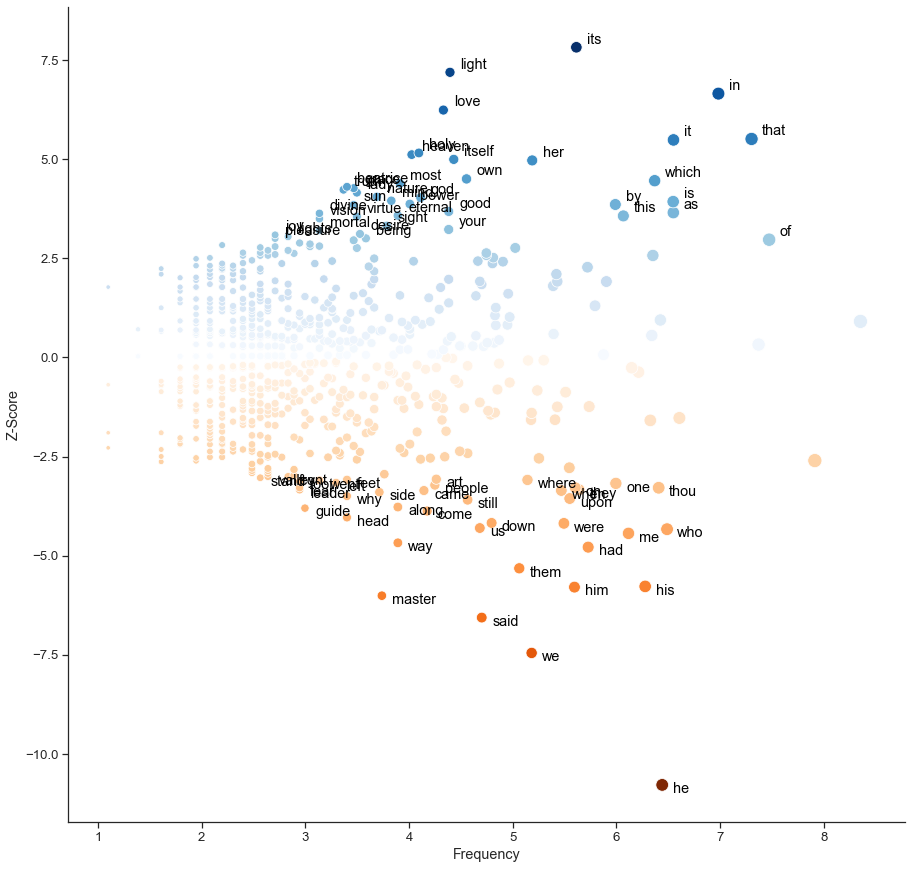

In [71]:
plt.figure(figsize=(15, 15))
sns.scatterplot(data=df_to_plot.loc[df_to_plot['Tendency'] == 'Inferno'], 
                x='Frequency', 
                y='Z-Score', 
                hue='Z-Score',
                palette='Oranges_r',
                size='Frequency',
                sizes=(20, 200))
sns.scatterplot(data=df_to_plot.loc[df_to_plot['Tendency'] == 'Paradiso'], 
                x='Frequency', 
                y='Z-Score', 
                hue='Z-Score',
                palette='Blues',
                size='Frequency',
                sizes=(20, 200))
plt.legend().set_visible(False)

for _word, _zscore in sorted(fw_results, key=lambda tup: tup[1], reverse=True)[:40]:
    if word_frequency_dict[_word] != 0:
        plt.text(math.log(word_frequency_dict[_word]) + 0.1, 
                 _zscore + 0.1, 
                 _word, 
                 horizontalalignment='left', 
                 size='medium', 
                 color='black', 
                 weight='light')
for _word, _zscore in sorted(fw_results, key=lambda tup: tup[1], reverse=True)[-40:]:
    if word_frequency_dict[_word] != 0:
        plt.text(math.log(word_frequency_dict[_word]) + 0.1, 
                 _zscore - 0.2, 
                 _word, 
                 horizontalalignment='left', 
                 size='medium', 
                 color='black', 
                 weight='light')
sns.despine()
plt.savefig(plots_directory + '/fightingwords_inferno_vs_paradiso_longfellow.png')

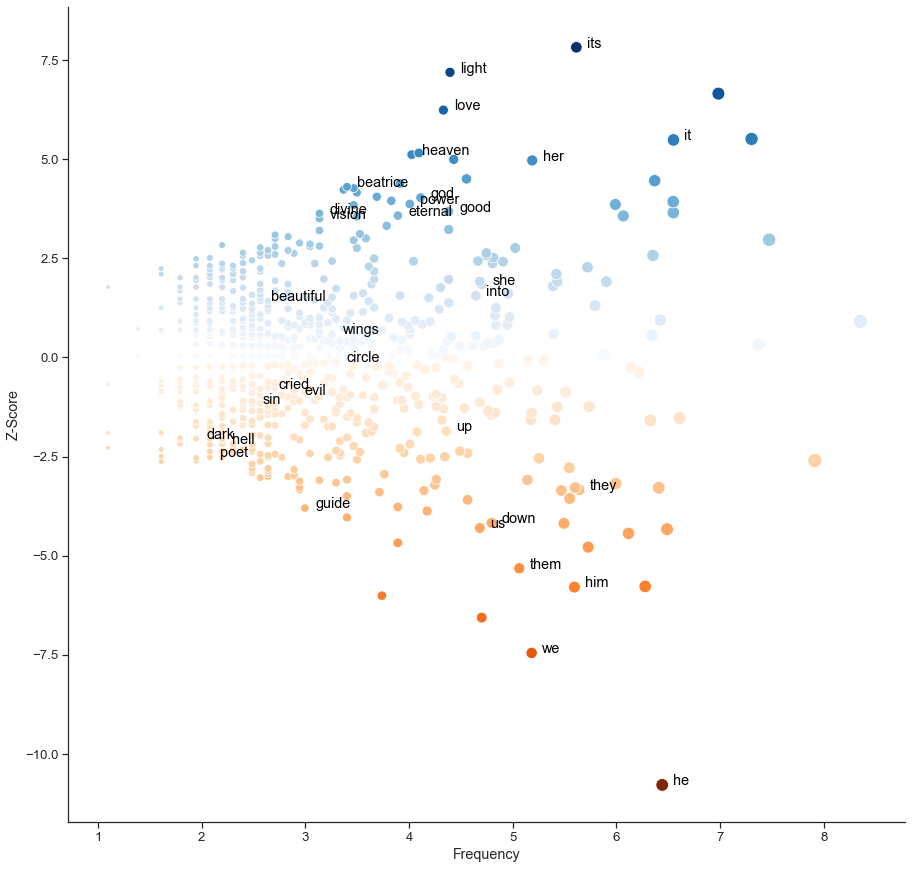

In [72]:
plt.figure(figsize=(15, 15))
sns.scatterplot(data=df_to_plot.loc[df_to_plot['Tendency'] == 'Inferno'], 
                x='Frequency', 
                y='Z-Score', 
                hue='Z-Score',
                palette='Oranges_r',
                size='Frequency',
                sizes=(20, 200))
sns.scatterplot(data=df_to_plot.loc[df_to_plot['Tendency'] == 'Paradiso'], 
                x='Frequency', 
                y='Z-Score', 
                hue='Z-Score',
                palette='Blues',
                size='Frequency',
                sizes=(20, 200))
plt.legend().set_visible(False)

for _word, _zscore in sorted(fw_results, key=lambda tup: tup[1], reverse=True):
    if _word in ['beatrice', 'vergil', 'poet', 'guide', 'light', 'love', 'he', 'she',
                 'her', 'him', 'we', 'us', 'they', 'them', 'dark', 'heaven', 'hell',
                 'sin', 'good', 'evil', 'forgive', 'power', 'eternal', 'divine', 'vision',
                 'cried', 'wept', 'god', 'cried', 'sinner', 'beauty', 'beautiful', 'it', 'its',
                 'story', 'up', 'down', 'into', 'wings', 'circle']:
        if word_frequency_dict[_word] != 0:
            plt.text(math.log(word_frequency_dict[_word]) + 0.1, 
                     _zscore, 
                     _word, 
                     horizontalalignment='left', 
                     size='medium', 
                     color='black', 
                     weight='light')
sns.despine()
plt.savefig(plots_directory + '/fightingwords_inferno_vs_paradiso_longfellow.selected.png')